# Decision Tree Splitting Criteria Examples

This notebook demonstrates the splitting criteria used in decision trees for both classification and regression problems.

## Explanation of Gini Impurity and Entropy

### Gini Impurity

Gini Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It reaches its minimum (zero) when all elements in the set belong to a single class.

The formula for Gini Impurity is:

\[G = 1 - \sum_{i=1}^{c} p_i^2\]

Where:
- \(G\) is the Gini Impurity
- \(c\) is the number of classes
- \(p_i\) is the probability of an item being classified for a particular class

### Entropy

Entropy is a measure of the average amount of information contained in each message. In the context of decision trees, it measures the impurity or uncertainty in the data set.

The formula for Entropy is:

\[H = -\sum_{i=1}^{c} p_i \log_2(p_i)\]

Where:
- \(H\) is the Entropy
- \(c\) is the number of classes
- \(p_i\) is the probability of an item being classified for a particular class

### Comparison

Both Gini Impurity and Entropy are measures of impurity and reach their minimum (zero) when all elements belong to a single class. The main differences are:

1. Scale: Gini Impurity ranges from 0 to 0.5 (for binary classification), while Entropy ranges from 0 to 1.
2. Computation: Gini Impurity is generally faster to compute as it doesn't involve logarithmic terms.
3. Sensitivity: Entropy is more sensitive to changes in the probabilities of classes.

In practice, both methods often yield similar results, and the choice between them is often based on computational efficiency or personal preference.

## 1. Classification Example

We'll use a simple dataset of fruits with weight and color features to classify them as apples or bananas.

In [4]:
import pandas as pd
import numpy as np

# Classification dataset
fruits = pd.DataFrame({
    'Weight': [150, 130, 180, 160, 140, 170],
    'Color': ['Red', 'Red', 'Yellow', 'Yellow', 'Red', 'Yellow'],
    'Type': ['Apple', 'Apple', 'Banana', 'Banana', 'Apple', 'Banana']
})
print(fruits)

   Weight   Color    Type
0     150     Red   Apple
1     130     Red   Apple
2     180  Yellow  Banana
3     160  Yellow  Banana
4     140     Red   Apple
5     170  Yellow  Banana


### A. Gini Impurity

Let's calculate Gini Impurity for splits by Color and Weight.

In [7]:
def gini_impurity(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return 1 - np.sum(probabilities**2)

# Split by Color
red = fruits[fruits['Color'] == 'Red']['Type']
yellow = fruits[fruits['Color'] == 'Yellow']['Type']
print("Number of nodes in red, yellow and total")
print(len(red), len(yellow), len(fruits))
gini_color = (len(red) / len(fruits)) * gini_impurity(red) + \
             (len(yellow) / len(fruits)) * gini_impurity(yellow)

# Split by Weight (≤150g and >150g)
light = fruits[fruits['Weight'] < 150]['Type']
heavy = fruits[fruits['Weight'] >= 150]['Type']
print("Number of nodes in light, heavy and total")
print(len(light), len(heavy), len(fruits))
gini_weight = (len(light) / len(fruits)) * gini_impurity(light) + \
              (len(heavy) / len(fruits)) * gini_impurity(heavy)

print(f"Gini Impurity (Color split): {gini_color:.4f}")
print(f"Gini Impurity (Weight split): {gini_weight:.4f}")

Number of nodes in red, yellow and total
3 3 6
Number of nodes in light, heavy and total
2 4 6
Gini Impurity (Color split): 0.0000
Gini Impurity (Weight split): 0.2500


### B. Entropy and Information Gain

Now let's calculate Entropy and Information Gain for the same splits.

In [8]:
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))

# Calculate initial entropy
# Total: 3 Apples, 3 Bananas
initial_entropy = entropy(fruits['Type'])

# Entropy after splitting by Color
# red: 3 Apples, 0 Bananas
# yellow: 0 Apples, 3 Bananas
entropy_color = (len(red) / len(fruits)) * entropy(red) + \
                (len(yellow) / len(fruits)) * entropy(yellow)
info_gain_color = initial_entropy - entropy_color

# Entropy after splitting by Weight
# light: 2 Apples, 0 Bananas
# heavy: 1 Apples, 3 Bananas
entropy_weight = (len(light) / len(fruits)) * entropy(light) + \
                 (len(heavy) / len(fruits)) * entropy(heavy)
info_gain_weight = initial_entropy - entropy_weight

print(f"Initial Entropy: {initial_entropy:.4f}")
print(f"Information Gain (Color split): {info_gain_color:.4f}")
print(f"Information Gain (Weight split): {info_gain_weight:.4f}")

Initial Entropy: 1.0000
Information Gain (Color split): 1.0000
Information Gain (Weight split): 0.4591


## 2. Regression Example

Now let's look at a regression example relating years of experience to salary.

In [9]:
# Regression dataset
salaries = pd.DataFrame({
    'Experience': [1, 2, 3, 4, 5, 6],
    'Salary': [40, 50, 60, 70, 80, 90]
})
print(salaries)

   Experience  Salary
0           1      40
1           2      50
2           3      60
3           4      70
4           5      80
5           6      90


### Mean Squared Error (MSE)

We'll calculate the MSE before and after splitting at 3 years of experience.

In [10]:
def mse(y):
    return np.mean((y - np.mean(y))**2)

initial_mse = mse(salaries['Salary'])

# Split at 3 years
left = salaries[salaries['Experience'] < 3]['Salary']
right = salaries[salaries['Experience'] >= 3]['Salary']

mse_split = (len(left) / len(salaries)) * mse(left) + \
            (len(right) / len(salaries)) * mse(right)

mse_reduction = initial_mse - mse_split

print(f"Initial MSE: {initial_mse:.2f}")
print(f"MSE after split: {mse_split:.2f}")
print(f"MSE Reduction: {mse_reduction:.2f}")

Initial MSE: 291.67
MSE after split: 91.67
MSE Reduction: 200.00


## Visualizing Decision Trees

Finally, let's visualize the decision trees for both classification and regression problems using scikit-learn.

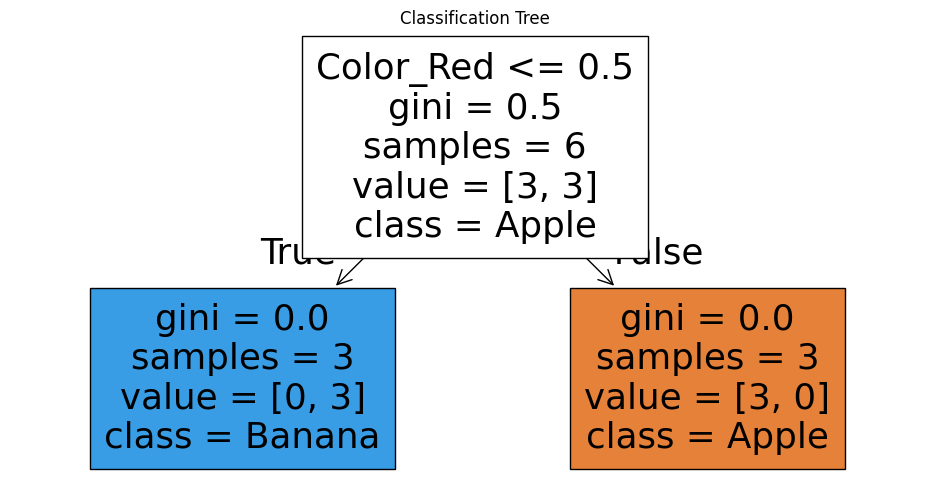

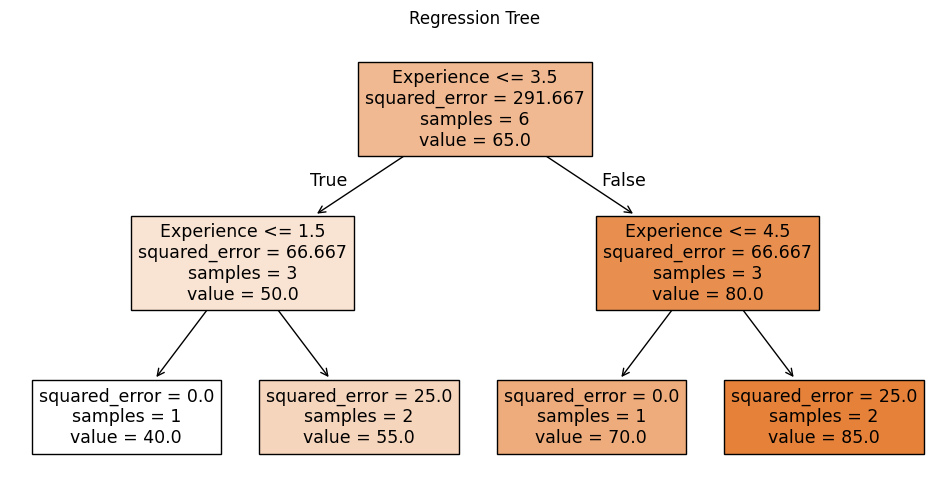

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
# Classification Tree
X_class = fruits[['Weight', 'Color']]
y_class = fruits['Type']
X_class_encoded = pd.get_dummies(X_class, columns=['Color'])

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_class_encoded, y_class)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X_class_encoded.columns, class_names=clf.classes_, filled=True)
plt.title("Classification Tree")
plt.show()

# Regression Tree
X_reg = salaries[['Experience']]
y_reg = salaries['Salary']

reg = DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X_reg, y_reg)

plt.figure(figsize=(12, 6))
plot_tree(reg, feature_names=['Experience'], filled=True)
plt.title("Regression Tree")
plt.show()